In [2]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import utils as ut
import lom


%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater

Text(0.5, 0.98, 'colours assigned')

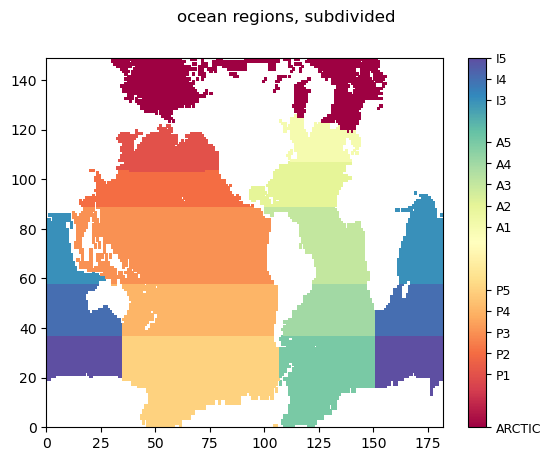

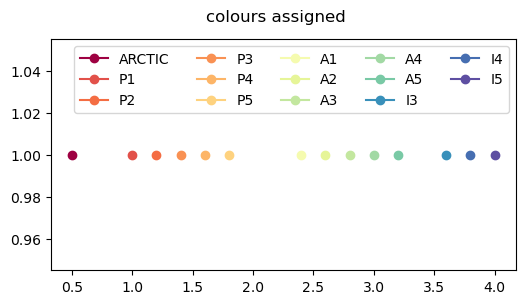

In [3]:
regs = ['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

regdict = {'ARCTIC' : {'number' : 0.5},
           'P1' : {'number': 1.0},
          'P2' : {'number': 1.2},
           'P3' : {'number': 1.4},
           'P4' : {'number': 1.6},
           'P5' : {'number': 1.8},
            'A1' : {'number': 2.4},
          'A2' : {'number': 2.6},
           'A3' : {'number': 2.8},
           'A4' : {'number': 3},
           'A5' : {'number': 3.2},
           'I3' : {'number': 3.6},
           'I4' : {'number': 3.8},
           'I5' : {'number': 4},
           
          }
    
tics = []
tcm = 'Spectral'
tmask = nc.Dataset('/gpfs/data/greenocean/software/resources/breakdown/clq_basin_masks_ORCA.nc')

maskno = np.zeros([149,182])
for i in range(0, len(regs)):
    maskno[tmask[regs[i]][:] == 1] = regdict[regs[i]]['number']
    tics.append(regdict[regs[i]]['number'])
maskno[maskno == 0] = np.nan


w = plt.pcolor(maskno, cmap = tcm, vmin = 0.5, vmax = 4)
cbar = plt.colorbar(w, ticks=tics)
t = cbar.ax.set_yticklabels(['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5'], fontsize = 9)
plt.suptitle('ocean regions, subdivided')

fact = 0.2
fig = plt.figure(figsize=(30*fact,15*fact))
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')
norm = matplotlib.colors.Normalize(vmin=0.5, vmax=4)
for i in range(0,len(regs)):
    rgba = cmap(norm(regdict[regs[i]]['number']))
    plt.plot(regdict[regs[i]]['number'], 1, marker = 'o', color = rgba, label = regs[i])
    regdict[regs[i]]['colour'] = rgba
plt.legend(ncol = 5, fontsize = 10)
plt.suptitle('colours assigned')

======= gpt=========

In [4]:
import glob

def make_yearlist(yrst, yrend, dtype, tr, baseDir):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

baseDir = '/gpfs/data/greenocean/software/runs/'
tr = 'TOM12_TJ_GEA0'
yrst = 2015
yrend = 2020
dtype = 'ptrc'
tylist = make_yearlist(yrst, yrend, dtype, tr, baseDir)
tdat_GEA0 = xr.open_mfdataset(tylist)

KeyboardInterrupt: 

In [54]:
tdat_GEA0

<xarray.Dataset>
Dimensions:               (y: 149, x: 182, deptht: 31, time_counter: 72,
                           axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
  * deptht                (deptht) float32 5.0 15.0 25.0 ... 4.75e+03 5.25e+03
    time_centered         (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter          (time_counter) object 2015-01-16 12:00:00 ... 2020-...
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/34)
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(12, 31, 2), meta=np.ndarray>
    Alkalini              (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    O2                    (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    DIC                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    ...                    ...
    BSi                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GON                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    C11                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    B14B                  (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    C14B                  (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    D14B                  (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
Attributes:
    name:         ORCA2_1m_20150101_20151231
    description:  planktom sms variables
    title:        planktom sms variables
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2023-Jun-20 15:12:18 BST

In [1]:
DIC = tdat_GEA0['DIC'].values
TA = tdat_GEA0['Alkalini'].values
nav_lat = tdat_GEA0['nav_lat'].values
nav_lon = tdat_GEA0['nav_lon'].values

# 加权平均
DIC_weighted_mean = (DIC * tmesh['csize']).mean(dim=['x', 'y'])
TA_weighted_mean = (TA * tmesh['csize']).mean(dim=['x', 'y'])

# 创建与加权平均后数据点相同形状的空数组
color_array = np.empty_like(DIC_weighted_mean)

# 获取区域掩码数组
mask_array = np.zeros_like(DIC_weighted_mean)

for reg in regs:
    mask_array += tmask[reg].isel(deptht=0)

# 为每个数据点分配对应的区域颜色值
for i, reg in enumerate(regs):
    mask = mask_array == i + 1
    color_array[mask] = regdict[reg]['number']

# 创建图形窗口并绘制图表
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制散点图
scatter = ax.scatter(DIC_weighted_mean, TA_weighted_mean, c=color_array, cmap='Spectral')

# 设置横轴和纵轴标签
ax.set_xlabel('DIC')
ax.set_ylabel('TA')

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Region')

# 显示图表
plt.show()

NameError: name 'tdat_GEA0' is not defined

================

broadcast it into 31 depths and multiply by tmesh.tmask

learn from GLODAP

In [ ]:
df_surface = tdat_GEA0.isel(deptht=0)
df_surface

In [ ]:
# tDIC = np.array(df['DIC'][:])
# tALK = np.array(df['Alkalini'][:])

# # tSAL = np.array(df['SAL'][:])
# # tTEMP = np.array(df['TEMP'][:])
# # tPRES = np.array(df['PRES'][:])

# # # dens = seawater.dens(tSAL,tTEMP,tPRES)
# # # tDIC_umolkg = tDIC*1000/dens
# # # tALK_umolkg = tALK*1000/dens

# tLAT = np.array(df['nav_lat'][:])
# tLON = np.array(df['nav_lon'][:])
# tYEAR = np.array(df['time_counter.year'])
# tdeptht = np.array(df['deptht'])

In [ ]:
# tGEO = np.zeros_like(tdeptht)

# #canadian arctic
# westlon = -148; eastlon = -50; southlat = 60; northlat = 85
# tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 1

# #euro arctic
# westlon = -30; eastlon = 91; southlat = 70; northlat = 85
# tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 2
# #atlantic 1
# westlon = -50; eastlon = 30; southlat = 0; northlat = 70
# tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 3
# #atlantic 2
# westlon = -100; eastlon = -50; southlat = 0; northlat = 60
# tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 3
# #siberian arctic
# westlon = 91; eastlon = 180; southlat = 68; northlat = 91
# tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 4
# #pacific coast
# westlon = -140; eastlon = -100; southlat = 10; northlat = 60
# tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 5
# #Russian-Alaskan Interface
# westlon = -180; eastlon = -148; southlat = 50; northlat = 90
# tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 6
# #Kamchatka Region
# westlon = 120; eastlon = 180; southlat = 48; northlat = 68
# tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 7
# #Japan and China
# westlon = 120; eastlon = 180; southlat = 10; northlat = 48
# tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 8
# #SO
# westlon = -180; eastlon = 180; southlat = -90; northlat = -60
# tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 9

======try=====

In [ ]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:] # area of grid cells

csize_broad = np.zeros([31,149,182])
for i in range(0,31):
    csize_broad[i,:,:] = tmesh['csize'].values
cvol = csize_broad * tmesh['e3t_0'][0,:,:,:] * tmesh['tmask'][0,:,:,:]

In [ ]:
maskno_broad = np.zeros([31,149,182])
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')

for i in range(0,31):
        maskno_broad[i,:,:] = maskno
        
maskno_broad = maskno_broad.astype('float')
tmesh_float = tmesh.tmask[0,:,:,:].values.astype('float')
  
maskno_broad =  maskno_broad * tmesh_float
maskno_broad[maskno_broad == 0] = np.nan  

In [11]:
dataset = nc.Dataset('/gpfs/data/greenocean/software/resources/breakdown/clq_basin_masks_ORCA.nc')


In [12]:
dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): X(182), Y(149)
    variables(dimensions): float32 X(Y, X), float32 Y(Y, X), float32 ATL(Y, X), float32 PAC(Y, X), float32 IND(Y, X), float32 SO(Y, X), float32 ARCTIC(Y, X), float32 P1(Y, X), float32 P2(Y, X), float32 P3(Y, X), float32 P4(Y, X), float32 P5(Y, X), float32 A1(Y, X), float32 A2(Y, X), float32 A3(Y, X), float32 A4(Y, X), float32 A5(Y, X), float32 I3(Y, X), float32 I4(Y, X), float32 I5(Y, X)
    groups: 

In [8]:
masked_data = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')

In [13]:
masked_data

<xarray.Dataset>
Dimensions:       (y: 149, x: 182, z: 31, t: 1)
Dimensions without coordinates: y, x, z, t
Data variables: (12/44)
    nav_lon       (y, x) float32 78.0 80.0 82.0 84.0 86.0 ... 0.0 0.0 0.0 0.0
    nav_lat       (y, x) float32 -78.19 -78.19 -78.19 -78.19 ... 0.0 0.0 0.0 0.0
    nav_lev       (z) float32 5.0 15.0 25.0 35.01 ... 4.25e+03 4.75e+03 5.25e+03
    time_counter  (t) float64 0.0
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    ...            ...
    gdepv         (t, z, y, x) float32 ...
    gdepw_0       (t, z, y, x) float32 ...
    gdept_1d      (t, z) float64 5.0 15.0 25.0 ... 4.25e+03 4.75e+03 5.25e+03
    gdepw_1d      (t, z) float64 0.0 10.0 20.0 30.0 ... 4.001e+03 4.5e+03 5e+03
    e3t_1d        (t, z) float64 10.0 10.0 10.0 10.01 ... 498.9 500.0 500.6
    e3w_1d        (t, z) float64 10.0 10.0 10.0 10.0 ... 495.1 498.0 499.5 500.3
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  28/02/2019 15:51:26 +0000

In [9]:
masked_data

<xarray.Dataset>
Dimensions:       (y: 149, x: 182, z: 31, t: 1)
Dimensions without coordinates: y, x, z, t
Data variables: (12/44)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    ...            ...
    gdepv         (t, z, y, x) float32 ...
    gdepw_0       (t, z, y, x) float32 ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  28/02/2019 15:51:26 +0000